# [DACON] 뉴스 토픽 분류 AI 경진대회

[주제] 한국어 뉴스 헤드라인을 이용하여, 뉴스의 주제를 분류하는 알고리즘 개발

[데이터] 2016년 1월부터 2020년 12월까지 게재 된 기사의 헤드 라인을 네이버 뉴스에서 수집

[출처] https://dacon.io/competitions/official/235747/overview/description

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-불러오기" data-toc-modified-id="데이터-불러오기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 불러오기</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#결측치-확인" data-toc-modified-id="결측치-확인-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>결측치 확인</a></span></li><li><span><a href="#topic별-비율-확인" data-toc-modified-id="topic별-비율-확인-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>topic별 비율 확인</a></span></li><li><span><a href="#topic별-뉴스-헤드라인의-워드클라우드" data-toc-modified-id="topic별-뉴스-헤드라인의-워드클라우드-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>topic별 뉴스 헤드라인의 워드클라우드</a></span><ul class="toc-item"><li><span><a href="#topic별-뉴스-헤드라인-추출" data-toc-modified-id="topic별-뉴스-헤드라인-추출-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>topic별 뉴스 헤드라인 추출</a></span></li><li><span><a href="#데이터-전처리" data-toc-modified-id="데이터-전처리-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>데이터 전처리</a></span></li><li><span><a href="#단어-빈도-딕셔너리-생성" data-toc-modified-id="단어-빈도-딕셔너리-생성-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>단어 빈도 딕셔너리 생성</a></span></li><li><span><a href="#워드클라우드" data-toc-modified-id="워드클라우드-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>워드클라우드</a></span><ul class="toc-item"><li><span><a href="#topic_idx=0(IT과학)의-워드클라우드" data-toc-modified-id="topic_idx=0(IT과학)의-워드클라우드-2.3.4.1"><span class="toc-item-num">2.3.4.1&nbsp;&nbsp;</span>topic_idx=0(IT과학)의 워드클라우드</a></span></li><li><span><a href="#topic_idx=1(경제)의-워드클라우드" data-toc-modified-id="topic_idx=1(경제)의-워드클라우드-2.3.4.2"><span class="toc-item-num">2.3.4.2&nbsp;&nbsp;</span>topic_idx=1(경제)의 워드클라우드</a></span></li><li><span><a href="#topic_idx=2(사회)의-워드클라우드" data-toc-modified-id="topic_idx=2(사회)의-워드클라우드-2.3.4.3"><span class="toc-item-num">2.3.4.3&nbsp;&nbsp;</span>topic_idx=2(사회)의 워드클라우드</a></span></li><li><span><a href="#topic_idx=3(생활문화)의-워드클라우드" data-toc-modified-id="topic_idx=3(생활문화)의-워드클라우드-2.3.4.4"><span class="toc-item-num">2.3.4.4&nbsp;&nbsp;</span>topic_idx=3(생활문화)의 워드클라우드</a></span></li><li><span><a href="#topic_idx=4(세계)의-워드클라우드" data-toc-modified-id="topic_idx=4(세계)의-워드클라우드-2.3.4.5"><span class="toc-item-num">2.3.4.5&nbsp;&nbsp;</span>topic_idx=4(세계)의 워드클라우드</a></span></li><li><span><a href="#topic_idx=5(스포츠)의-워드클라우드" data-toc-modified-id="topic_idx=5(스포츠)의-워드클라우드-2.3.4.6"><span class="toc-item-num">2.3.4.6&nbsp;&nbsp;</span>topic_idx=5(스포츠)의 워드클라우드</a></span></li><li><span><a href="#topic_idx=6(정치)의-워드클라우드" data-toc-modified-id="topic_idx=6(정치)의-워드클라우드-2.3.4.7"><span class="toc-item-num">2.3.4.7&nbsp;&nbsp;</span>topic_idx=6(정치)의 워드클라우드</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#토픽-분류-모델---머신러닝" data-toc-modified-id="토픽-분류-모델---머신러닝-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>토픽 분류 모델 - 머신러닝</a></span><ul class="toc-item"><li><span><a href="#릿지-회귀-모델" data-toc-modified-id="릿지-회귀-모델-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>릿지 회귀 모델</a></span><ul class="toc-item"><li><span><a href="#릿지-회귀-모델-결과-제출" data-toc-modified-id="릿지-회귀-모델-결과-제출-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>릿지 회귀 모델 결과 제출</a></span></li></ul></li><li><span><a href="#로지스틱-회귀-모델" data-toc-modified-id="로지스틱-회귀-모델-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>로지스틱 회귀 모델</a></span></li><li><span><a href="#나이브베이즈-분류기" data-toc-modified-id="나이브베이즈-분류기-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>나이브베이즈 분류기</a></span></li><li><span><a href="#라쏘-회귀" data-toc-modified-id="라쏘-회귀-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>라쏘 회귀</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>LGBM</a></span></li></ul></li><li><span><a href="#토픽-분류-모델---딥러닝" data-toc-modified-id="토픽-분류-모델---딥러닝-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>토픽 분류 모델 - 딥러닝</a></span><ul class="toc-item"><li><span><a href="#CNN" data-toc-modified-id="CNN-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>CNN</a></span></li><li><span><a href="#양방향-LSTM" data-toc-modified-id="양방향-LSTM-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>양방향 LSTM</a></span></li><li><span><a href="#LDA-이용" data-toc-modified-id="LDA-이용-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>LDA 이용</a></span></li></ul></li></ul></div>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from konlpy.tag import Okt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding, Bidirectional, LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, GlobalMaxPooling1D, AveragePooling1D

## 데이터 불러오기

In [4]:
train = pd.read_csv("data/train_data.csv")
train

,index,title,topic_idx
0,0,인천→핀란드 항공기 결항…휴가철 여행객 분통,4
1,1,실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화,4
2,2,이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것,4
3,3,NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합,4
4,4,시진핑 트럼프에 중미 무역협상 조속 타결 희망,4
...,...,...,...
45649,45649,KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략,1
45650,45650,1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토,2
45651,45651,게시판 키움증권 2020 키움 영웅전 실전투자대회,1
45652,45652,답변하는 배기동 국립중앙박물관장,2


* index : 헤드라인 인덱스
* title : 뉴스 헤드라인
* topic_idx : 뉴스 주제 인덱스 값(label)

In [4]:
topic = pd.read_csv("data/topic_dict.csv")
topic

,topic,topic_idx
0,IT과학,0
1,경제,1
2,사회,2
3,생활문화,3
4,세계,4
5,스포츠,5
6,정치,6


In [4]:
test = pd.read_csv('data/test_data.csv')
test

,index,title
0,45654,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,45655,어버이날 맑다가 흐려져…남부지방 옅은 황사
2,45656,내년부터 국가RD 평가 때 논문건수는 반영 않는다
3,45657,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
4,45658,회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간
...,...,...
9126,54780,인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여
9127,54781,노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
9128,54782,40년 전 부마항쟁 부산 시위 사진 2점 최초 공개
9129,54783,게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계


## EDA

### 결측치 확인

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45654 entries, 0 to 45653
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      45654 non-null  int64 
 1   title      45654 non-null  object
 2   topic_idx  45654 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [8]:
train.isnull().sum()

index        0
title        0
topic_idx    0
dtype: int64

### topic별 비율 확인

In [6]:
train['topic_idx'].value_counts(sort=False)

0    4824
1    6222
2    7362
3    5933
4    7629
5    6933
6    6751
Name: topic_idx, dtype: int64

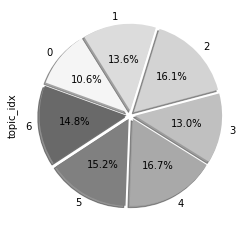

In [7]:
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#F5F5F5', '#DCDCDC', '#D3D3D3', '#C0C0C0', '#A9A9A9', '#808080', '#696969']
train['topic_idx'].value_counts(sort=False).plot.pie(autopct="%.1f%%", 
                                                      startangle=160, 
                                                      counterclock=False, 
                                                      colors=colors,
                                                      explode=explode,
                                                      shadow=True)

### topic별 뉴스 헤드라인의 워드클라우드

#### topic별 뉴스 헤드라인 추출

In [61]:
# topic_idx=0인 경우
title_0 = train[['title']].loc[train['topic_idx']==0]
title_0 = ' '.join(title_0['title'])

# topic_idx=1인 경우
title_1 = train[['title']].loc[train['topic_idx']==1]
title_1 = ' '.join(title_1['title'])

# topic_idx=2인 경우
title_2 = train[['title']].loc[train['topic_idx']==2]
title_2 = ' '.join(title_2['title'])

# topic_idx=3인 경우
title_3 = train[['title']].loc[train['topic_idx']==3]
title_3 = ' '.join(title_3['title'])

# topic_idx=4인 경우
title_4 = train[['title']].loc[train['topic_idx']==4]
title_4 = ' '.join(title_4['title'])

# topic_idx=5인 경우
title_5 = train[['title']].loc[train['topic_idx']==5]
title_5 = ' '.join(title_5['title'])

# topic_idx=6인 경우
title_6 = train[['title']].loc[train['topic_idx']==6]
title_6 = ' '.join(title_6['title'])

#### 데이터 전처리

In [60]:
t = Okt()

stopwords = ['종합', '전국', '최고', '올해', '최근', '최대', '여자',
             '방문', '여성', '게시판', '오후', '내일', '소식', '기자',
             '목표', '이익', '특징', '전환', '이동', '판매', '내년', 
             '속보', '공개', '국내', '작년', '특징', '증가', '실적',
             '한국', '지원', '사장', '회장', '협회', '사망', '공격',
             '제재', '속보', '회의']

def tokenizer(text):
    tokens = [token for token in t.nouns(text) if len(token) > 1 and token not in stopwords]
    return tokens

In [67]:
rst = string[150:400]
print(t.pos(rst))

[('인', 'Noun'), ('가자지구', 'Noun'), ('서', 'Josa'), ('16', 'Number'), ('세', 'Noun'), ('소년', 'Noun'), ('이스라엘군', 'Noun'), ('총격', 'Noun'), ('에', 'Josa'), ('사망', 'Noun'), ('인도', 'Noun'), ('48년', 'Number'), ('만에', 'Josa'), ('파키스탄', 'Noun'), ('공습', 'Noun'), ('…', 'Punctuation'), ('테러', 'Noun'), ('캠프', 'Noun'), ('폭격', 'Noun'), ('종합', 'Noun'), ('2', 'Number'), ('보', 'Noun'), ('美', 'Foreign'), ('대선', 'Noun'), ('TV', 'Alpha'), ('토론', 'Noun'), ('음담패설', 'Noun'), ('만회', 'Noun'), ('실패', 'Noun'), ('트럼프', 'Noun'), ('…', 'Punctuation'), ('사과', 'Noun'), ('대신', 'Noun'), ('빌', 'Verb'), ('클린턴', 'Noun'), ('공격', 'Noun'), ('해', 'Verb'), ('역효과', 'Noun'), ('푸틴', 'Noun'), ('한반도', 'Noun'), ('상황', 'Noun'), ('진전', 'Noun'), ('위', 'Noun'), ('한', 'Josa'), ('방안', 'Noun'), ('김정은', 'Noun'), ('위원장', 'Noun'), ('과', 'Josa'), ('논의', 'Noun'), ('특검', 'Noun'), ('면죄부', 'Noun'), ('받은', 'Verb'), ('트럼프', 'Noun'), ('스캔들', 'Noun'), ('보도', 'Noun'), ('언론', 'Noun'), ('맹공', 'Noun'), ('…', 'Punctuation'), ('국민', 'Noun'), ('의', 'Josa'), ('적',

In [62]:
tokens_0 = tokenizer(title_0)
tokens_1 = tokenizer(title_1)
tokens_2 = tokenizer(title_2)
tokens_3 = tokenizer(title_3)
tokens_4 = tokenizer(title_4)
tokens_5 = tokenizer(title_5)
tokens_6 = tokenizer(title_6)

#### 단어 빈도 딕셔너리 생성

In [156]:
def count_dict(token):
    cnt = {}
    for word in token:
        cnt[word] = cnt.get(word, 0) + 1
    return cnt

In [157]:
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

def word_graph(cnt, max_words=10):
    sorted_w = sorted(cnt.items(), key=lambda kv:kv[1])
    n, w = zip(*sorted_w[-max_words:])
    plt.barh(n, w)
    plt.show()

In [83]:
count_dict_0 = count_dict(tokens_0)
count_dict_1 = count_dict(tokens_1)
count_dict_2 = count_dict(tokens_2)
count_dict_3 = count_dict(tokens_3)
count_dict_4 = count_dict(tokens_4)
count_dict_5 = count_dict(tokens_5)
count_dict_6 = count_dict(tokens_6)

#### 워드클라우드

In [6]:
font_path = 'c:/Windows/Fonts/malgun.ttf'

wordcloud = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=400,
    max_words=50)

##### topic_idx=0(IT과학)의 워드클라우드

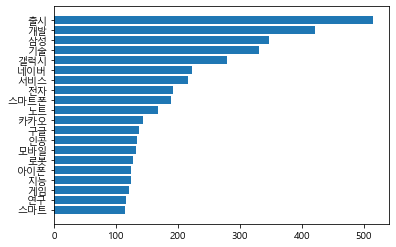

In [85]:
word_graph(count_dict_0, max_words=20)

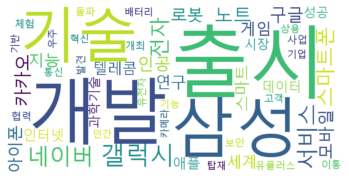

In [89]:
wordcloud.generate_from_frequencies(count_dict_0)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##### topic_idx=1(경제)의 워드클라우드

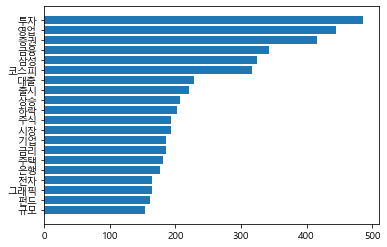

In [86]:
word_graph(count_dict_1, max_words=20)

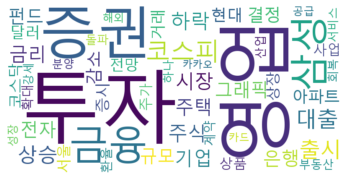

In [90]:
wordcloud.generate_from_frequencies(count_dict_1)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##### topic_idx=2(사회)의 워드클라우드

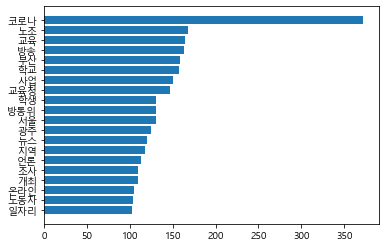

In [87]:
word_graph(count_dict_2, max_words=20)

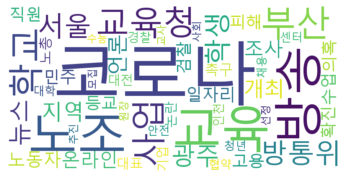

In [91]:
wordcloud.generate_from_frequencies(count_dict_2)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##### topic_idx=3(생활문화)의 워드클라우드

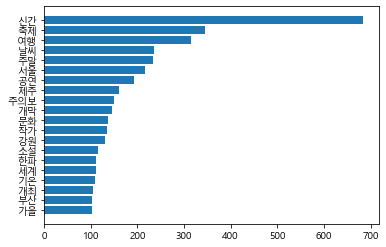

In [92]:
word_graph(count_dict_3, max_words=20)

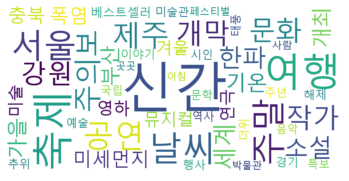

In [93]:
wordcloud.generate_from_frequencies(count_dict_3)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##### topic_idx=4(세계)의 워드클라우드

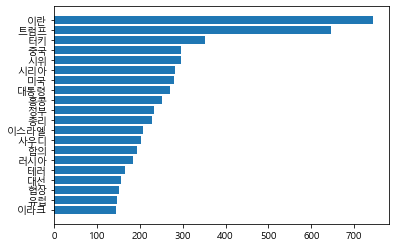

In [94]:
word_graph(count_dict_4, max_words=20)

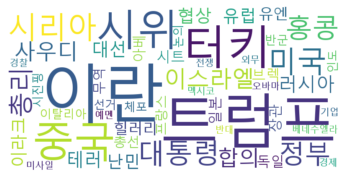

In [95]:
wordcloud.generate_from_frequencies(count_dict_4)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##### topic_idx=5(스포츠)의 워드클라우드

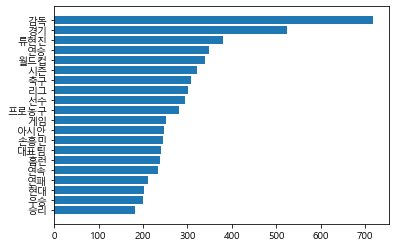

In [96]:
word_graph(count_dict_5, max_words=20)

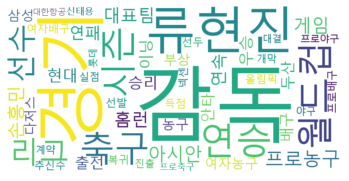

In [97]:
wordcloud.generate_from_frequencies(count_dict_5)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##### topic_idx=6(정치)의 워드클라우드

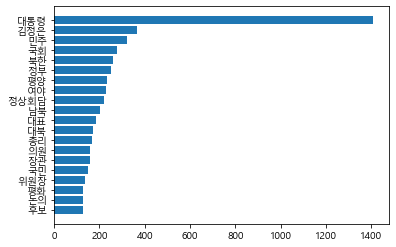

In [98]:
word_graph(count_dict_6, max_words=20)

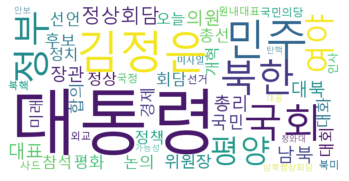

In [99]:
wordcloud.generate_from_frequencies(count_dict_6)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

## 토픽 분류 모델 - 머신러닝

In [41]:
x = train['title'].tolist()
y = train['topic_idx'].tolist()

In [42]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.1, random_state=1)

print(len(x_train))
print(len(x_test))
print(y_test[:20])

41088
4566
[1 2 2 1 0 4 6 6 6 5 3 6 3 5 4 3 0 3 4 3]


In [70]:
stopwords = ['종합', '전국', '최고', '올해', '최근', '최대', '여자',
             '방문', '여성', '게시판', '오후', '내일', '소식', '기자',
             '목표', '이익', '특징', '전환', '이동', '판매', '내년', 
             '속보', '공개', '국내', '작년', '특징', '증가', '실적',
             '한국', '지원', '사장', '회장', '협회', '사망', '공격',
             '제재', '속보', '회의', '뉴스']

def tokenizer2(text):
    result = []
    for word, tag in t.pos(text, norm=True, stem=True):
        if word not in stopwords:
            result.append('/'.join([word, tag]))
    return result

In [71]:
tfidf = TfidfVectorizer(tokenizer=tokenizer2, sublinear_tf=True)

x_train_tfidf = tfidf.fit_transform(x_train)
x_val_tfidf = tfidf.transform(x_val)

In [72]:
print(x_train_tfidf[:150:300])

  (0, 23451)	0.3271643380634612
  (0, 17899)	0.21842422361490157
  (0, 18315)	0.3423540598864161
  (0, 26940)	0.3751512755263665
  (0, 7757)	0.4094777836470289
  (0, 20274)	0.2290495250126901
  (0, 25468)	0.394288061824074
  (0, 16177)	0.4601203719484134


### 릿지 회귀 모델

In [21]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier(alpha=1.95)
ridge.fit(x_train_tfidf, y_train)
print(ridge.score(x_train_tfidf, y_train))
print(ridge.score(x_val_tfidf, y_test)) # 0.8659

0.9395930685358256
0.8659658344283837


#### 릿지 회귀 모델 결과 제출

In [142]:
test_x = test['title'].tolist()
test_x_tfidf = tfidf.transform(test_x)
pred = ridge.predict(test_x_tfidf)

array([3, 3, 2, 0, 3, 0, 5, 3, 4, 1])

In [143]:
submission = pd.read_csv("data/sample_submission.csv")
submission['topic_idx'] = pred
submission.to_csv('ridge4.csv', index=False)

### 로지스틱 회귀 모델

In [19]:
lr = LogisticRegression()
lr.fit(x_train_tfidf, y_train)
print(lr.score(x_train_tfidf, y_train))
print(lr.score(x_val_tfidf, y_test))

0.9109875968567752
0.8468951922023875


### 나이브베이즈 분류기

In [20]:
nb = MultinomialNB()
nb.fit(x_train_tfidf, y_train)

print(nb.score(x_train_tfidf, y_train))
print(nb.score(x_val_tfidf, y_test))

0.8978725734468691
0.8398861022889059


### 라쏘 회귀

In [21]:
lasso = LogisticRegression(penalty='l1', solver='liblinear', C=2.8)
lasso.fit(x_train_tfidf, y_train)

print(lasso.score(x_train_tfidf, y_train))
print(lasso.score(x_val_tfidf, y_test))

0.9316595022314705
0.8430620961559523


### LGBM

In [7]:
from lightgbm import LGBMClassifier

lgbm_model=LGBMClassifier(n_estimators=200,learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_model.fit(x_train_tfidf,y_train)

print(lgbm_model.score(x_train_tfidf, y_train))
print(lgbm_model.score(x_val_tfidf, y_test))

NameError: name 'x_train_tfidf' is not defined

## 토픽 분류 모델 - 딥러닝

In [5]:
title = train['title'].tolist()
idx = train['topic_idx'].tolist()

print(len(title))
print(len(title[0]))
print(set(idx))

45654
24
{0, 1, 2, 3, 4, 5, 6}


자체 토크나이저 사용

In [6]:
stopwords = ['종합', '전국', '최고', '올해', '최근', '최대', 
             '방문', '게시판', '오후', '내일', '소식', '기자',
             '목표', '이익', '특징', '전환', '이동', '내년', 
             '속보', '공개', '작년', '특징', '증가', '실적',
             '지원', '사장', '회장', '협회', '공격',
             '제재', '속보', '회의', '뉴스']

t = Okt()

def tokenizer2(text, lst):
    result = []
    for word, tag in t.pos(text, norm=True, stem=True):
        if word not in lst:
            result.append('/'.join([word, tag]))
    return result

In [7]:
words = []
for i in range(len(title)):
    words.append(tokenizer2(title[i], stopwords))

In [8]:
max_words = 28000

tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(words)
x = tokenizer.texts_to_sequences(words)

print([len(doc) for doc in x[:50]])
print(len(tokenizer.word_index))

[10, 10, 13, 13, 9, 10, 11, 15, 11, 12, 9, 10, 11, 12, 6, 10, 9, 10, 11, 11, 13, 10, 14, 11, 10, 12, 11, 9, 12, 12, 12, 14, 9, 12, 10, 12, 12, 12, 10, 14, 13, 9, 8, 9, 9, 13, 12, 15, 12, 14]
31013


제공되는 토크나이저 사용

In [77]:
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(title)
x = tokenizer.texts_to_sequences(title)

print([len(doc) for doc in x[:20]])
print(len(tokenizer.word_index))

[3, 2, 5, 3, 7, 5, 4, 4, 9, 8, 5, 7, 5, 7, 8, 2, 5, 6, 5, 5]
101081


C:\spyder\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


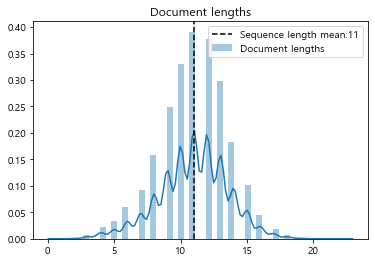

가장 긴 문장 :  22
가장 짧은 문장 :  1


In [86]:
train['len'] = train.title.apply(lambda words:len(t.morphs(words)))

mean_seq_len = np.round(train.len.mean()).astype(int)
sns.distplot(tuple(train.len), hist=True, kde=True, label='Document lengths')
plt.axvline(x=mean_seq_len, color='k', linestyle='--', label=f'Sequence length mean:{mean_seq_len}')
plt.title('Document lengths')
plt.legend()
plt.show()

print('가장 긴 문장 : ', train['len'].max())
print('가장 짧은 문장 : ', train['len'].min())

In [9]:
maxlen = 16

x_pad = pad_sequences(x, maxlen=maxlen, padding='post', truncating='post')

print(x_pad[5])

[2228 2851    6  680  223 1766 5172 1141    2  110    0    0    0    0
    0    0]


In [10]:
y = np.array(idx)
print(set(y))

{0, 1, 2, 3, 4, 5, 6}


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_pad, y, test_size=0.1, random_state=0)

print(len(x_train))
print(len(x_test))
print(y_train[:20])

41088
4566
[5 1 2 4 1 6 3 4 6 0 0 6 1 3 5 2 4 6 5 3]


In [19]:
from keras.utils.np_utils import to_categorical

y_tr = to_categorical(y_train)
y_ts = to_categorical(y_test)
print(y_tr)
print(y_tr.shape)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]
(41088, 7)


### CNN

In [25]:
model2 = Sequential([
    Embedding(max_words, 512, input_length=maxlen),
    Conv1D(32, 3, padding='same', activation='relu'),
    AveragePooling1D(2, padding='same'),
    Dropout(0.2),
    
    Conv1D(64, 3, strides=1, padding='same', activation='relu'),
    AveragePooling1D(2, padding='same'),
    Dropout(0.2),
    
    Conv1D(128, 3, padding='same', activation='relu'),
    AveragePooling1D(2, padding='same'),
    Dropout(0.2),
    
    Conv1D(256, 3, padding='same', activation='relu'),
    AveragePooling1D(2, padding='same'),
    Dropout(0.2),
    
    Conv1D(512, 3, padding='same', activation='relu'),
    AveragePooling1D(2, padding='same'),
    Dropout(0.2),
    
    Conv1D(1024, 3, padding='same', activation='relu'),
    AveragePooling1D(2, padding='same'),
    Dropout(0.2),
    
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.1),
    
    Dense(7, activation='softmax')
])

In [26]:
model2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 16, 512)           14336000  
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 16, 32)            49184     
_________________________________________________________________
average_pooling1d_6 (Average (None, 8, 32)             0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 8, 32)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 8, 64)             6208      
_________________________________________________________________
average_pooling1d_7 (Average (None, 4, 64)             0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 4, 64)            

In [28]:
hist = model2.fit(x_train, y_tr,
                 validation_data=(x_test, y_ts),
                 verbose=1, batch_size=100, epochs=7) # 0.8417

Epoch 1/7
411/411 [==============================] - 354s 861ms/step - loss: 0.2314 - accuracy: 0.9338 - val_loss: 0.6461 - val_accuracy: 0.8296
Epoch 2/7
411/411 [==============================] - 352s 856ms/step - loss: 0.1936 - accuracy: 0.9449 - val_loss: 0.7817 - val_accuracy: 0.8263
Epoch 3/7
411/411 [==============================] - 347s 844ms/step - loss: 0.1655 - accuracy: 0.9536 - val_loss: 0.8425 - val_accuracy: 0.8250
Epoch 4/7
411/411 [==============================] - 342s 832ms/step - loss: 0.1398 - accuracy: 0.9617 - val_loss: 0.8015 - val_accuracy: 0.8325
Epoch 5/7
411/411 [==============================] - 338s 821ms/step - loss: 0.1210 - accuracy: 0.9656 - val_loss: 0.9515 - val_accuracy: 0.8250
Epoch 6/7
411/411 [==============================] - 331s 804ms/step - loss: 0.1089 - accuracy: 0.9712 - val_loss: 0.9108 - val_accuracy: 0.8279
Epoch 7/7
411/411 [==============================] - 291s 707ms/step - loss: 0.0916 - accuracy: 0.9748 - val_loss: 0.9385 - val_ac

In [29]:
test = pd.read_csv('data/test_data.csv')

test_x = np.array([x for x in test['title']])
test_y = np.zeros((test_x.shape[0], 7))

In [30]:
t_words = []
for i in range(len(test_x)):
    t_words.append(tokenizer2(test_x[i], stopwords))
    
sequences_test = tokenizer.texts_to_sequences(t_words)

In [32]:
test_x = pad_sequences(sequences_test, maxlen=maxlen, padding='post', truncating='post')

In [33]:
test_y = model2.predict(test_x)
test_y

array([[5.6050391e-07, 1.3050308e-05, 1.7004474e-03, ..., 6.1820168e-07,
        1.3768827e-09, 3.3004195e-09],
       [6.6059650e-24, 7.1584810e-19, 3.0975264e-11, ..., 9.2225910e-24,
        2.0093313e-33, 7.8043309e-32],
       [7.9732239e-03, 3.0176444e-02, 9.2742223e-01, ..., 9.0167485e-03,
        1.6345840e-03, 7.7654771e-03],
       ...,
       [3.8227466e-07, 9.6460899e-06, 1.4306022e-03, ..., 4.2416573e-07,
        8.0746104e-10, 1.9945172e-09],
       [3.7299672e-03, 2.0907257e-02, 9.5635164e-01, ..., 4.3250970e-03,
        5.7947182e-04, 3.3401269e-03],
       [4.6042067e-05, 3.1339255e-04, 1.1800829e-01, ..., 1.2802491e-02,
        3.8544082e-03, 8.6486781e-01]], dtype=float32)

In [34]:
topic = []
for i in range(len(test_y)):
    topic.append(np.argmax(test_y[i]))
    
sub = pd.read_csv('data/sample_submission.csv')
sub['topic_idx'] = topic
sub.to_csv('cnn11.csv', index=False)

### 양방향 LSTM

In [33]:
model = Sequential([
    Embedding(max_words, 512, input_length=maxlen),
    Bidirectional(LSTM(512)),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')
])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 16, 512)           14336000  
_________________________________________________________________
bidirectional_2 (Bidirection (None, 1024)              4198400   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 64)               

In [35]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [39]:
history = model.fit(x_train, y_tr,
                     validation_data=(x_test, y_ts),
                     verbose=1, batch_size=100, epochs=5) 

Epoch 1/5
411/411 [==============================] - 446s 1s/step - loss: 0.0240 - accuracy: 0.9930 - val_loss: 1.2265 - val_accuracy: 0.8176
Epoch 2/5
411/411 [==============================] - 421s 1s/step - loss: 0.0233 - accuracy: 0.9930 - val_loss: 1.2195 - val_accuracy: 0.8119
Epoch 3/5
411/411 [==============================] - 466s 1s/step - loss: 0.0167 - accuracy: 0.9946 - val_loss: 1.3123 - val_accuracy: 0.8239
Epoch 4/5
411/411 [==============================] - 584s 1s/step - loss: 0.0150 - accuracy: 0.9958 - val_loss: 1.2866 - val_accuracy: 0.8143
Epoch 5/5
411/411 [==============================] - 449s 1s/step - loss: 0.0163 - accuracy: 0.9951 - val_loss: 1.2724 - val_accuracy: 0.8154


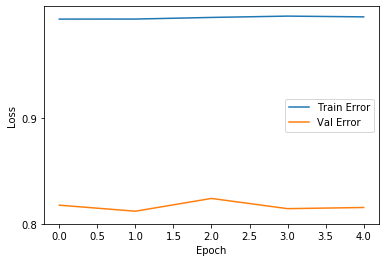

In [76]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(hist['epoch'], hist['accuracy'], label = 'Train Error')
plt.plot(hist['epoch'], hist['val_accuracy'], label = 'Val Error')
plt.yticks(np.arange(0.8, 1.0, 0.1))
plt.legend()
plt.show()

### LDA 이용

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

In [17]:
np.set_printoptions(precision=3)

lda = LatentDirichletAllocation(n_components=7,  # 추출할 topic의 수 10
                                max_iter=5,  # 최대 반복 횟수 5
                                topic_word_prior = 0.1, doc_topic_prior=1.0, # beta 0.1, alpha 1.0
                                learning_method='online',  # 속도를 위해 online으로 설정
                                n_jobs=-1,  # 모든 프로세서 사용
                                random_state=0)

cv = CountVectorizer(token_pattern="[\w']{3,}", stop_words='english',
                    max_features=2000, min_df=5, max_df=0.5)
train_cv = cv.fit_transform(train['title'])
train_topics = lda.fit_transform(train_cv)

n_components : 10, perplexity : 3615.713
n_components : 11, perplexity : 3836.236
n_components : 12, perplexity : 4041.147
n_components : 13, perplexity : 4237.328
n_components : 14, perplexity : 4425.056
n_components : 15, perplexity : 4602.381
n_components : 16, perplexity : 4776.936
n_components : 17, perplexity : 4942.809
n_components : 18, perplexity : 5099.168
n_components : 19, perplexity : 5256.061
n_components : 20, perplexity : 5404.145


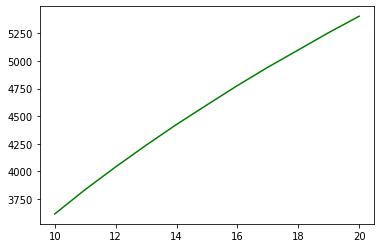

10

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior=0.1,
                     doc_topic_prior=1.0): # start와 end는 토픽 수의 시작 값과 최종 값
    iter_num = [] # 그림을 그리기 위해 topic의 수를 담기 위함
    per_value = [] # perplexity 값을 담기 위함
    
    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components=i, max_iter=max_iter,
                                       topic_word_prior=topic_word_prior,
                                       doc_topic_prior=doc_topic_prior,
                                       learning_method='batch', n_jobs=-1,
                                       random_state=7)
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components : {i}, perplexity : {pv:0.3f}')
    
    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    
    return start + per_value.index(min(per_value))

show_perplexity(train_cv, start=10, end=20)

In [18]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print('Topic #%d : ' % topic_idx, end='')
        print(', '.join([feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]]))
            # 역순으로 정렬 후 처음부터 n_top_words까지 가져오는 것 의미.
    print()
    
print_top_words(lda, cv.get_feature_names(), 7)

Topic #0 : 朴대통령, 그래픽, 코스피, 스마트폰, 앞두고, 올림픽, 1분기
Topic #1 : 코로나19, 가능성, kbs, 민주노총, 코로나, 문대통령, 글로벌
Topic #2 : 월드컵, 류현진, 서비스, skt, mlb, 아시안게임, 러시아
Topic #3 : 게시판, 온라인, kist, 베트남, 이벤트, 미사일, 스마트
Topic #4 : 대통령, 김정은, 시리아, 외국인, nba, 일자리, 위원장
Topic #5 : 트럼프, 특징주, 영업익, 삼성전자, 사우디, 2분기, 이스라엘
Topic #6 : 네이버, 프로농구, 영업이익, 손흥민, 3분기, 카카오, 브렉시트



In [21]:
lda = LatentDirichletAllocation(n_components=7, # 추출할 topic의 수
                                max_iter=20, # 기존에 5에서 20으로 늘림
                                topic_word_prior=0.1,
                                doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs=-1,
                                random_state=7)

train_topics = lda.fit_transform(train_cv)

topic = print_top_words(lda, cv.get_feature_names(), 10)

Topic #0 : 그래픽, 김정은, 프로농구, mlb, 가능성, 손흥민, nba, 이스라엘, 다저스, 위원장
Topic #1 : 월드컵, 코로나19, 시리아, 삼성전자, 사우디, 문대통령, kbs, 2018, 온라인, 여자배구
Topic #2 : 코스피, 특징주, 아시안게임, 스마트폰, 1분기, lgu, 외국인, lg전자, 영업이익, 마지막
Topic #3 : 게시판, 대통령, 류현진, skt, 서비스, 영업익, 2분기, 카카오, 여자농구, 미세먼지
Topic #4 : 朴대통령, 한국당, 3분기, 앞두고, 브렉시트, 프랑스, 한반도, 정상회담, 국민의당, 文대통령
Topic #5 : sk텔레콤, 아파트, lg유플러스, 이벤트, 최지만, 인터넷, 우리은행, 원내대표, 10월, 강정호
Topic #6 : 트럼프, 네이버, 러시아, 올림픽, 글로벌, 더민주, 프로배구, 미사일, 대한항공, 힐러리



In [22]:
type(topic)

NoneType